<a href="https://colab.research.google.com/github/uzayr-iqbal-hamid/OIBSIP-Data-Science/blob/main/unemployment-analysis/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [2]:
# storing data in a DataFrame
df = pd.read_csv('data.csv')

# displaying 5 rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# displaying the shape
df.shape

(768, 7)

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# checking for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
# cleaning the data i.e. removing the null valued rows
df = df.dropna()
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [8]:
# changing column names to ensure there aren't unnecessary whitespaces
df.columns = [
    'States',
    'Date',
    'Frequency',
    'Estimated Unemployment Rate',
    'Estimated Employed',
    'Estimated Labour Participation Rate',
    'Area'
]

In [9]:
# displaying 3 rows
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [10]:
# converting 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [11]:
# converting 'Frequency' to categorical data type
df['Frequency'] = df['Frequency'].astype('category')

In [35]:
# extracting month from the 'Date'
df['Month'] = df['Date'].dt.month

In [36]:
# creating a new column 'MonthNumber'
df['MonthNumber'] = df['Month'].apply(lambda x: int(x))

In [37]:
# creating a new column 'MonthName'
df['MonthName'] = df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [38]:
df['Area'] = df['Area'].astype('category')

In [39]:
# dropping Month column
df.drop(columns='Month', inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


STATS

In [40]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber
count,740.000000,7.400000e+02,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,6.390541
std,10.721298,8.087988e+06,8.111094,3.235070
min,0.000000,4.942000e+04,13.330000,1.000000
25%,4.657500,1.190404e+06,38.062500,4.000000
50%,8.350000,4.744178e+06,41.160000,6.000000
75%,15.887500,1.127549e+07,45.505000,9.000000
max,76.740000,4.577751e+07,72.570000,12.000000


In [41]:
# a summary of 3 columns
round(df[
    ['Estimated Unemployment Rate',
     'Estimated Employed',
     'Estimated Labour Participation Rate'
    ]
]).describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.778378,7.204460e+06,42.641892
std,10.726622,8.087988e+06,8.116715
min,0.000000,4.942000e+04,13.000000
25%,5.000000,1.190404e+06,38.000000
50%,8.000000,4.744178e+06,41.000000
75%,16.000000,1.127549e+07,45.250000
max,77.000000,4.577751e+07,73.000000


In [42]:
# finding mean values for the numerical columns with respect to 'Area'
stats_region = df.groupby(['Area'])[[
    'Estimated Unemployment Rate',
    'Estimated Employed',
    'Estimated Labour Participation Rate'
]].mean().reset_index()

# rounding to 2 decimal places
round(stats_region, 2)

,Area,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


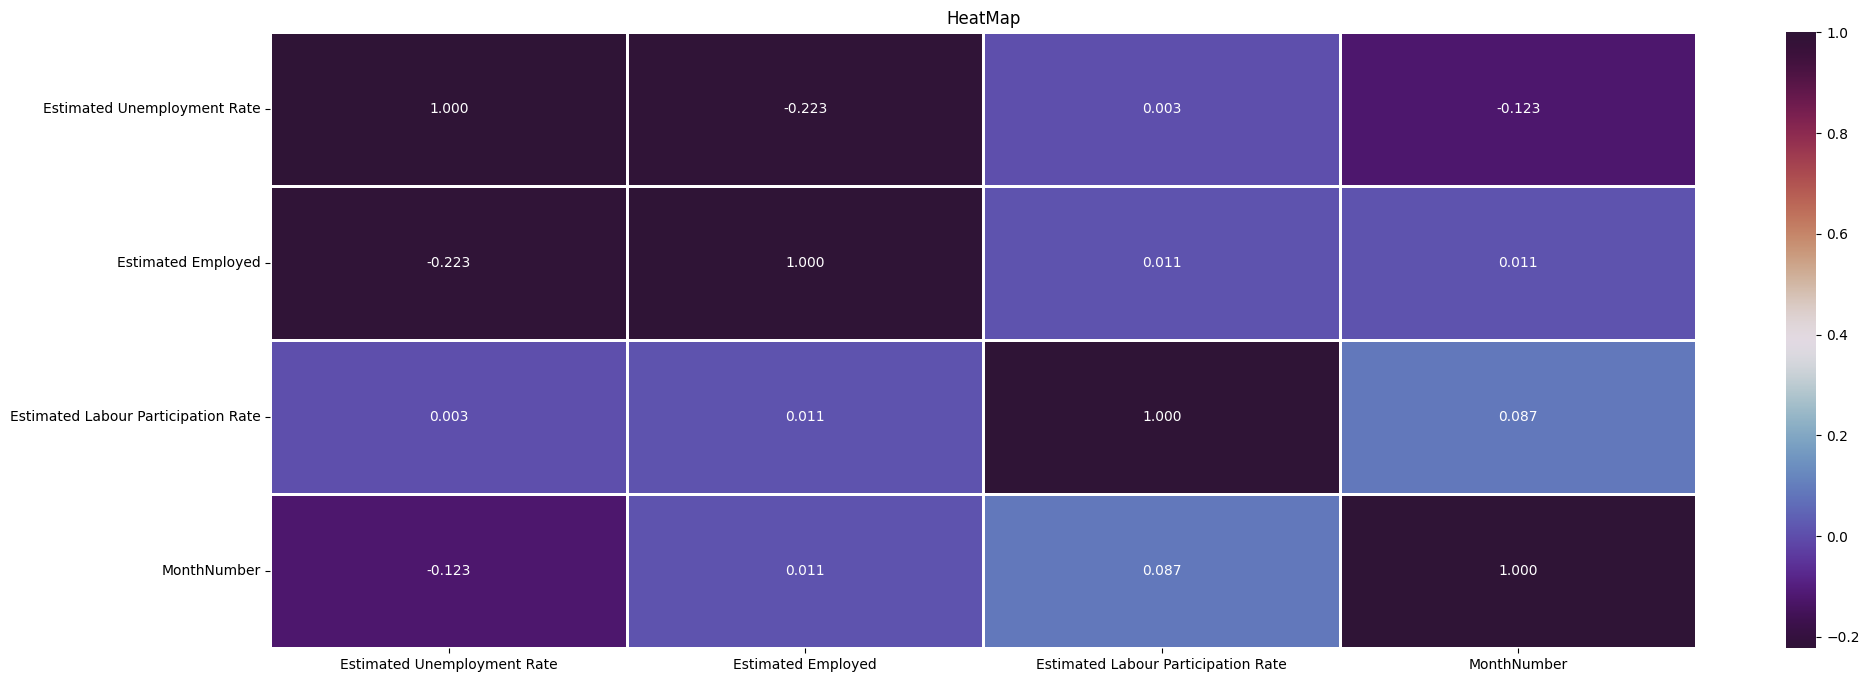

In [43]:
# 'HeatMap' to find the 'pair-wise correlation' values

# all numerical columns
HeatMap = df[['Estimated Unemployment Rate',
     'Estimated Employed',
     'Estimated Labour Participation Rate',
     'MonthNumber'
]]

# correlation
HeatMap = HeatMap.corr()

# plotting
plt.figure(figsize=(23, 8))
sns.heatmap(HeatMap, annot=True, cmap='twilight_shifted', fmt='.3f', linewidth=1)
plt.title('HeatMap')
plt.show()

Exploratory Data Analysis [EDA]

In [44]:
# box-plot to show unemployment in each state
states = px.box(
    df,
    x = 'States',
    y = 'Estimated Unemployment Rate',
    color = 'States',
    title = 'unemployment-rate',
    template = 'plotly'
)
states.show()

In [46]:
# scatter matrix plot for relationship

relationship = px.scatter_matrix(
    df,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Area')
relationship.show()

In [47]:
# "Bar-plot" to find the avg. unemployment rate in each state

Df = df[[
    'Estimated Unemployment Rate',
    'States'
]]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
Df = Df.groupby('States').mean().reset_index()

#sorting the values in the dataframe
Df = Df.sort_values('Estimated Unemployment Rate')

avg_employment = px.bar(
    Df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='State-wise Average Employment Rate'
)
avg_employment.show()

In [48]:
# "Bar-plot" to find the unemployment rate for each "Area" month-wise
area = px.bar(
    df,
    x='Area',
    y='Estimated Unemployment Rate',
    animation_frame = 'MonthName',
    color='States',
    title='Area-wise Unemployment Rate',
    height=800
)

area.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

area.show()

In [52]:
#creating a new dataframe with 'State-wise' & 'Area-wisee' Estimated Unemployment Rate
unempDF = df[[
    'States',
    'Area',
    'Estimated Unemployment Rate',
    'Estimated Employed',
    'Estimated Labour Participation Rate'
]]

unempDF = unempDF.groupby(['Area','States'])['Estimated Unemployment Rate'].mean().reset_index()

#printing the new dataframe
unempDF.head(4)

,Area,States,Estimated Unemployment Rate
0,Rural,Andhra Pradesh,5.526429
1,Rural,Assam,4.490833
2,Rural,Bihar,16.770000
3,Rural,Chandigarh,NaN


In [53]:
#a sunburst chart (hierarchical chart) for unemployment rate area-wise and state-wise
unemp_rate = px.sunburst(
    unempDF,
    path=['Area','States'],
    values='Estimated Unemployment Rate',
    title= 'unemployment rate in each area and state',
    height=650
)
unemp_rate.show()

Impact of Lockdown on States

In [57]:
#creating a scatter geospatial plot

figure = px.scatter_geo(
    df,
    'Estimated Employed',
    'Estimated Unemployment Rate',
    color="Area",
    hover_name="States",
    size="Estimated Unemployment Rate",
    animation_frame="MonthName",
    scope='asia',
    title='Lockdown Impact throughout India'
)

figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

#updating the geospatial axes ranges and ocean color
figure.update_geos(lataxis_range=[5,35],
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

figure.show()

In [58]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
df47 = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
df14 = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [59]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df47g = df47.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df14g = df14.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

#renaming the column values for better understanding
df47g.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df47g.head()

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [60]:
#computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)


In [61]:
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
df47g = df47g.sort_values('% change in unemployment')

In [62]:
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
change = px.bar(
    df47g,
    x='States',
    y='% change in unemployment',
    color='% change in unemployment',
    title='% change in Unemployment A/ Lockdown')

change.show()

In [63]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'

    elif x <= 20:
        #hardImpactedState
        return '🥲😥'

    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'

    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'

    return x

In [67]:
# new column to the 'dataframe', classifying the "%change in employment" on the basis of impactStatus
df47g['impactStatus'] = df47g['% change in unemployment'].apply(lambda x:sort_impact(x))

In [66]:
# "bar-graph" to classify and denote the impact of lockdown on employment for different states
impact = px.bar(
    df47g,
    y='States',
    x='% change in unemployment',
    color='impactStatus',
    title='Lockdown Impact on Employment in India')

impact.show()